In [1]:
%matplotlib inline
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
def plot_word_vectors(model, words, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    '''Plot word vectors. The vector dimensions are reduced using PCA.'''
    assert len(words)%2 == 0
    vectors = [model[word] for word in words]
    pca = PCA(n_components=2, whiten=True)
    vectors2d = pca.fit(vectors).transform(vectors)
    plt.figure(figsize=(6,6))
    plt.axis([x1, x2, y1, y2])

    first = True 
    for point, word in zip(vectors2d , words):
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    if arrows:
        for i in range(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    if title:
        plt.title(title)
                        
    plt.tight_layout()
    plt.show()

In [3]:
import gensim.models.doc2vec
from gensim.models import Doc2Vec

model_path = 'dewiki.model'
model = Doc2Vec.load(model_path)

In [13]:
type(model)

gensim.models.doc2vec.Doc2Vec

In [4]:
model['oslo']

array([ 0.16561957, -0.45235384, -0.2737236 , -0.38005993,  0.0208368 ,
        0.10018941, -0.01834315, -0.2471729 , -0.09508403,  0.26318482,
       -0.04551636,  0.39029408, -0.13411477,  0.04214469,  0.12268919,
        0.54447657,  0.30459803, -0.17018038,  0.26738995,  0.12906072,
        0.2417001 , -0.65271133, -0.2585247 , -0.35323906, -0.33187887,
       -0.45476386, -0.19780624, -0.5544196 , -0.01850744, -0.05906534,
        0.11849206,  0.6424973 ,  0.5738913 , -0.25409514, -0.32020658,
        0.08770767, -0.5677004 , -0.00503131,  0.33926225, -0.01615623,
        0.18231127, -0.22497888,  0.14632115,  0.04800866,  0.16964605,
       -0.31926322, -0.03441416,  0.11744983, -0.26566878, -0.37873948,
       -0.07778656,  0.4613255 , -0.07811023,  0.18649979,  0.09861764,
       -0.20238943, -0.33093372, -0.1596131 , -0.22486725,  0.4566659 ,
       -0.39610633, -0.08926995,  0.67662966, -0.10478224, -0.02410377,
       -0.07467781,  0.5759032 ,  0.16337037, -0.09067793, -0.05

## Plot similar words

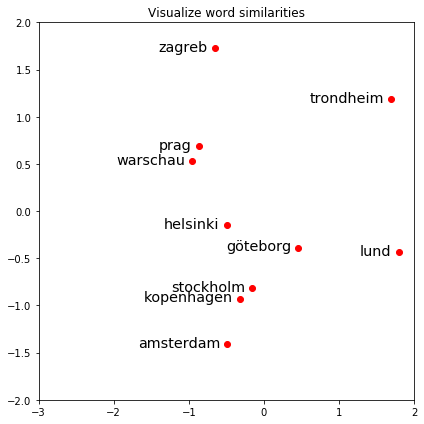

In [5]:
matches = model.wv.most_similar(positive=['oslo'], negative=[], topn=10)
words = [match[0] for match in matches]
plot_word_vectors(model, words, False, False, -3, 2, -2, 2, 'Visualize word similarities')

## Plot country/capital relation

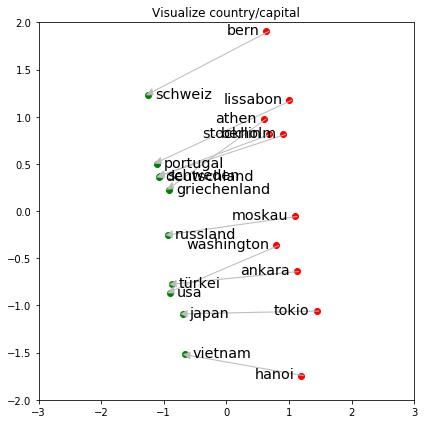

In [6]:
words  = ["Athen","Griechenland","Berlin","Deutschland","Ankara","Türkei","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
words = [word.lower() for word in words]
plot_word_vectors(model, words, x1=-3, x2=3, y1=-2, y2=2, title='Visualize country/capital')

## Plot noun/verb relation

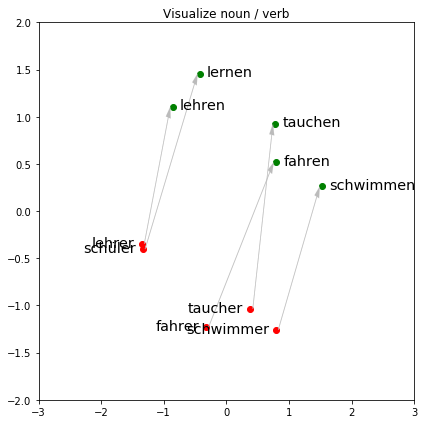

In [7]:
words = ["Taucher", "tauchen", "Fahrer", "fahren", "Schwimmer", "schwimmen", "Lehrer", "lehren", "Schüler", "lernen"]
words = [word.lower() for word in words]
plot_word_vectors(model, words, x1=-3, x2=3, y1=-2, y2=2, title='Visualize noun / verb')

## Plot country/currency relation

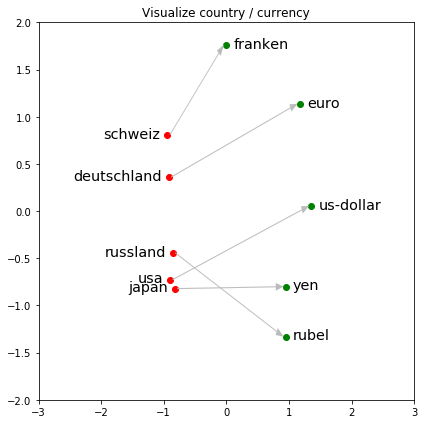

In [8]:
words = ["Schweiz","Franken","Deutschland","Euro","Japan","Yen","Russland","Rubel","USA","US-Dollar"]
words = [word.lower() for word in words]
plot_word_vectors(model, words, x1=-3, x2=3, y1=-2, y2=2, title='Visualize country / currency')

## Plot country/language relation

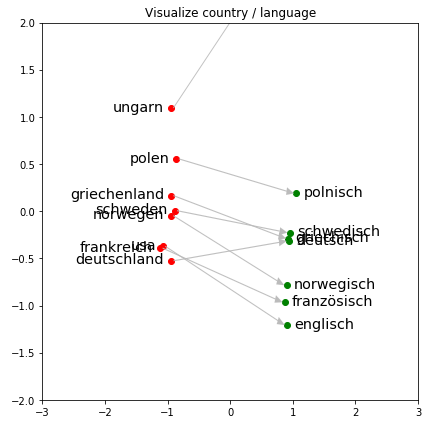

In [9]:
words = ["Deutschland","Deutsch","USA","Englisch","Frankreich","Französisch","Griechenland","Griechisch","Norwegen","Norwegisch","Schweden","Schwedisch","Polen","Polnisch","Ungarn","Ungarisch"]
words = [word.lower() for word in words]
plot_word_vectors(model, words, x1=-3, x2=3, y1=-2, y2=2, title='Visualize country / language')